## Qualitative Analysis for Event Log with Nonlinearities

Implemented decision points with guards:
- Request Manager or Standard Approval:
    - Request Manager Approval if total_price >= 600 or supplier is "Dunder Mifflin"
    - Request Standard Approval if total_price <= 1200
- Manager Rejection or Approval:
    - Manager Rejection if total_price >= 500 and item_amount mod 2 == 1
    - Otherwise Manager Approval 
- Standard Rejection or Approval:
    - Standard Rejection if total_price >= 500 and item_amount mod 2 == 1
    - Otherwise Standard Approval 
- Are the goods fine or damaged?
    - Goods Damaged if item_amount^3 > total_price
    - Goods Fine if item_amount^3 <= total_price
- What happens if the goods are fine?
    - Pay Invoice (no Guard, but dependent on previous attivities: if Goods Fine and Receive Invoice)
    - Cancel Order (no Guard, but dependent on previous attivities: if Goods Fine and either Revocation Costumer or Revocation Vendor)
- What happens after Receive Invoice?
    - Revocation Costumer if supplierMap(supplier) >= item_amount where supplierMap maps "Saturn" to 10, "Dunder Mifflin" to 20, "Staples" to 30 and everything else to 40
    - Recovation Vendor if total_price/item_amount > 100 
    - Pay Invoice (no Guard, but dependent on previous attivities: if Receive Invoice and Goods Fine)
    - Cancel Payment (no Guard, but dependent on previous attivities: if Receive Invoice and Goods Damaged)

In [1]:
import os
from exdpn.util import import_log
from exdpn.data_petri_net import data_petri_net
from exdpn.guards import ML_Technique

c:\Users\Mara Tews\Documents\Uni\RWTH_DataScience\SS_2022\SS2022_ProcessDiscoveryUsingPython\eXdpn\venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### First, look which machine learning guard has the highest performance for a decision point.

In [2]:
event_log_nonlinearities = import_log(os.path.join(os.getcwd(), "..", "datasets", "p2p_nonlinearities.xes"))
dpn_nonlinearities = data_petri_net.Data_Petri_Net(event_log = event_log_nonlinearities,
                                                   event_level_attributes = ["item_category", "item_id", "item_amount", "supplier", "total_price"],
                                                   verbose = False)

decision_points = list(dpn_nonlinearities.decision_points)
decision_points

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Liblinear failed to converge, increase the number of iterations.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
Liblinear failed to converge, increase the number of iterations.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


[({'create purchase order'}, {'request manager approval', 'request standard approval'}),
 ({'request standard approval'}, {'approve purchase', 'reject purchase'}),
 ({'goods fine'}, {'pay invoice', 'cancel order'}),
 ({'request manager approval'}, {'manager reject purchase', 'manager approve purchase'}),
 ({'inspect goods'}, {'goods fine', 'goods damaged'}),
 ({'receive invoice'}, {'cancel payment', 'revocation vendor', 'pay invoice', 'revocation costumer'})]

Decision point:  ({'create purchase order'}, {'request manager approval', 'request standard approval'})
Best guard: <exdpn.guards.logistic_regression_guard.Logistic_Regression_Guard object at 0x00000246478E8040>


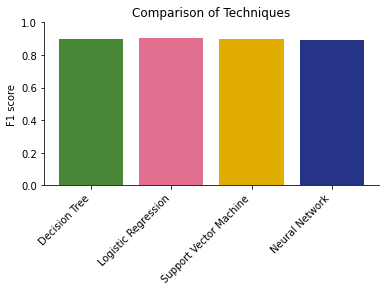

In [3]:
print("Decision point: ", decision_points[0])
dpn_nonlinearities.guard_manager_per_place[decision_points[0]].get_comparison_plot()
best_guard = dpn_nonlinearities.get_guard_at_place(decision_points[0])
print("Best guard:", best_guard)

Decision point:  ({'request standard approval'}, {'approve purchase', 'reject purchase'})
Best guard: <exdpn.guards.neural_network_guard.Neural_Network_Guard object at 0x00000246478E9150>


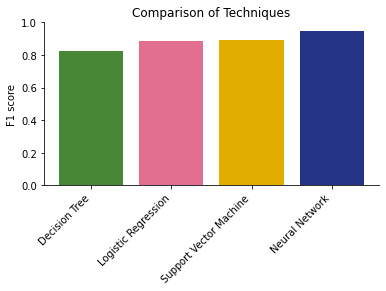

In [4]:
print("Decision point: ", decision_points[1])
dpn_nonlinearities.guard_manager_per_place[decision_points[1]].get_comparison_plot()
best_guard = dpn_nonlinearities.get_guard_at_place(decision_points[1])
print("Best guard:", best_guard)

Decision point:  ({'goods fine'}, {'pay invoice', 'cancel order'})
Best guard: <exdpn.guards.svm_guard.SVM_Guard object at 0x00000246478E9D80>


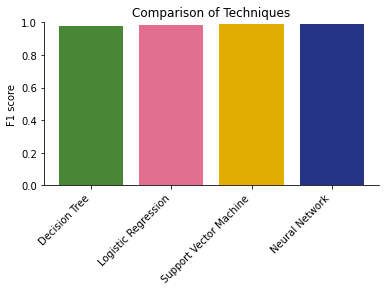

In [5]:
print("Decision point: ", decision_points[2])
dpn_nonlinearities.guard_manager_per_place[decision_points[2]].get_comparison_plot()
best_guard = dpn_nonlinearities.get_guard_at_place(decision_points[2])
print("Best guard:", best_guard)

Decision point:  ({'request manager approval'}, {'manager reject purchase', 'manager approve purchase'})
Best guard: <exdpn.guards.svm_guard.SVM_Guard object at 0x00000246478EA6B0>


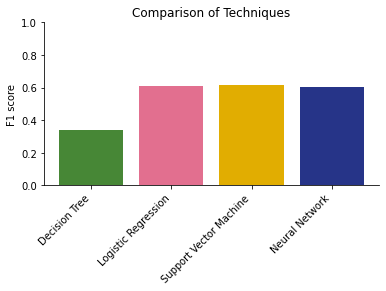

In [6]:
print("Decision point: ", decision_points[3])
dpn_nonlinearities.guard_manager_per_place[decision_points[3]].get_comparison_plot()
best_guard = dpn_nonlinearities.get_guard_at_place(decision_points[3])
print("Best guard:", best_guard)

Decision point:  ({'inspect goods'}, {'goods fine', 'goods damaged'})
Best guard: <exdpn.guards.neural_network_guard.Neural_Network_Guard object at 0x00000246478EACE0>


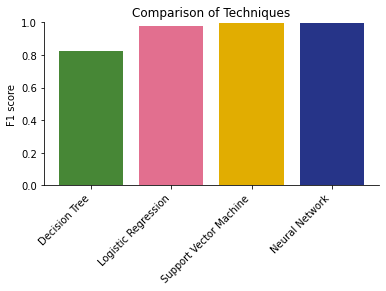

In [7]:
print("Decision point: ", decision_points[4])
dpn_nonlinearities.guard_manager_per_place[decision_points[4]].get_comparison_plot()
best_guard = dpn_nonlinearities.get_guard_at_place(decision_points[4])
print("Best guard:", best_guard)

Decision point:  ({'receive invoice'}, {'cancel payment', 'revocation vendor', 'pay invoice', 'revocation costumer'})
Best guard: <exdpn.guards.neural_network_guard.Neural_Network_Guard object at 0x00000246478EB610>


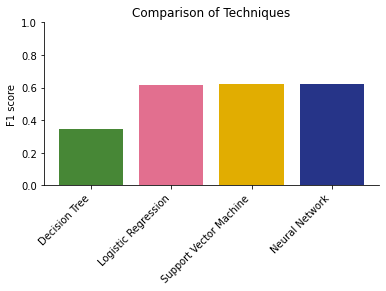

In [8]:
print("Decision point: ", decision_points[5])
dpn_nonlinearities.guard_manager_per_place[decision_points[5]].get_comparison_plot()
best_guard = dpn_nonlinearities.get_guard_at_place(decision_points[5])
print("Best guard:", best_guard)

### Decision Tree

Decision point:  ({'create purchase order'}, {'request manager approval', 'request standard approval'})


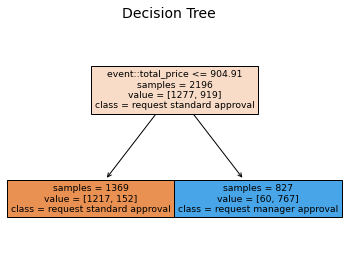

In [9]:
print("Decision point: ", decision_points[0])
dt_guard = dpn_nonlinearities.guard_manager_per_place[decision_points[0]].guards_list[ML_Technique.DT]
if dt_guard.is_explainable():
    dt_guard.get_explainable_representation()

Decision point:  ({'request standard approval'}, {'approve purchase', 'reject purchase'})


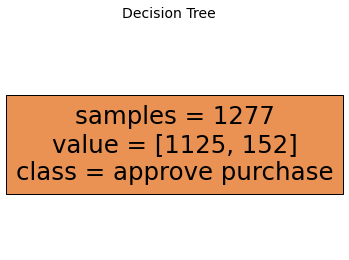

In [10]:
print("Decision point: ", decision_points[1])
dt_guard = dpn_nonlinearities.guard_manager_per_place[decision_points[1]].guards_list[ML_Technique.DT]
if dt_guard.is_explainable():
    dt_guard.get_explainable_representation()

Decision point:  ({'goods fine'}, {'pay invoice', 'cancel order'})


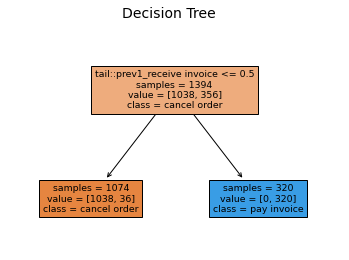

In [11]:
print("Decision point: ", decision_points[2])
dt_guard = dpn_nonlinearities.guard_manager_per_place[decision_points[2]].guards_list[ML_Technique.DT]
if dt_guard.is_explainable():
    dt_guard.get_explainable_representation()

Decision point:  ({'request manager approval'}, {'manager reject purchase', 'manager approve purchase'})


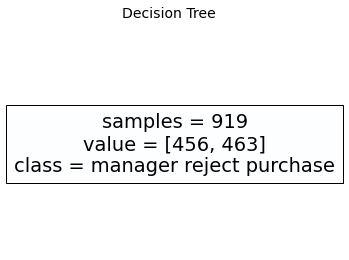

In [12]:
print("Decision point: ", decision_points[3])
dt_guard = dpn_nonlinearities.guard_manager_per_place[decision_points[3]].guards_list[ML_Technique.DT]
if dt_guard.is_explainable():
    dt_guard.get_explainable_representation()

Decision point:  ({'inspect goods'}, {'goods fine', 'goods damaged'})


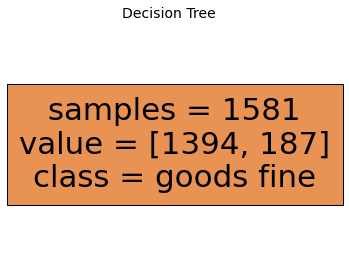

In [13]:
print("Decision point: ", decision_points[4])
dt_guard = dpn_nonlinearities.guard_manager_per_place[decision_points[4]].guards_list[ML_Technique.DT]
if dt_guard.is_explainable():
    dt_guard.get_explainable_representation()

Decision point:  ({'receive invoice'}, {'cancel payment', 'revocation vendor', 'pay invoice', 'revocation costumer'})


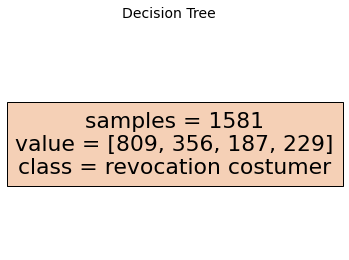

In [14]:
print("Decision point: ", decision_points[5])
dt_guard = dpn_nonlinearities.guard_manager_per_place[decision_points[5]].guards_list[ML_Technique.DT]
if dt_guard.is_explainable():
    dt_guard.get_explainable_representation()

### Neural Network

Decision point:  ({'create purchase order'}, {'request manager approval', 'request standard approval'})


100%|██████████| 100/100 [00:35<00:00,  2.84it/s]


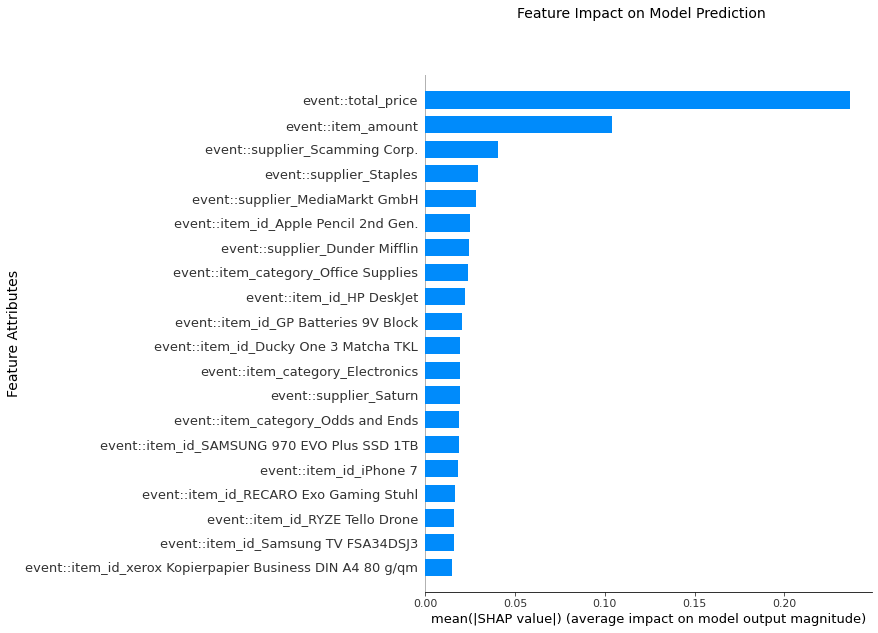

In [15]:
print("Decision point: ", decision_points[0])
nn_guard = dpn_nonlinearities.guard_manager_per_place[decision_points[0]].guards_list[ML_Technique.NN]
if nn_guard.is_explainable():
    # use sample of test data to speed up computation of explainable representation
    sampled_test_data = dpn_nonlinearities.guard_manager_per_place[decision_points[0]].df_X.sample(n = min(100, len(dpn_nonlinearities.guard_manager_per_place[decision_points[0]].df_X)))
    nn_guard.get_explainable_representation(sampled_test_data)

Decision point:  ({'request standard approval'}, {'approve purchase', 'reject purchase'})


100%|██████████| 100/100 [00:39<00:00,  2.50it/s]


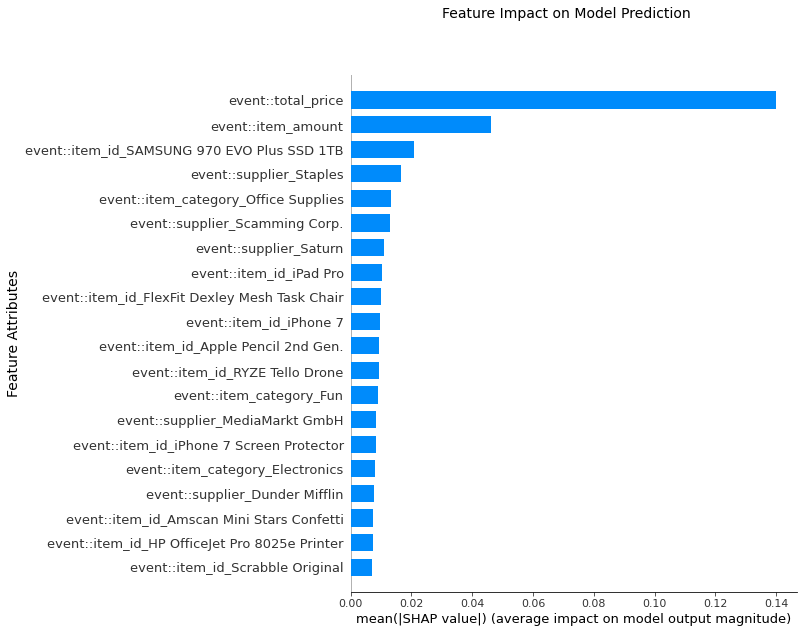

In [16]:
print("Decision point: ", decision_points[1])
nn_guard = dpn_nonlinearities.guard_manager_per_place[decision_points[1]].guards_list[ML_Technique.NN]
if nn_guard.is_explainable():
    # use sample of test data to speed up computation of explainable representation
    sampled_test_data = dpn_nonlinearities.guard_manager_per_place[decision_points[1]].df_X.sample(n = min(100, len(dpn_nonlinearities.guard_manager_per_place[decision_points[1]].df_X)))
    nn_guard.get_explainable_representation(sampled_test_data)

Decision point:  ({'goods fine'}, {'pay invoice', 'cancel order'})


100%|██████████| 100/100 [00:53<00:00,  1.87it/s]


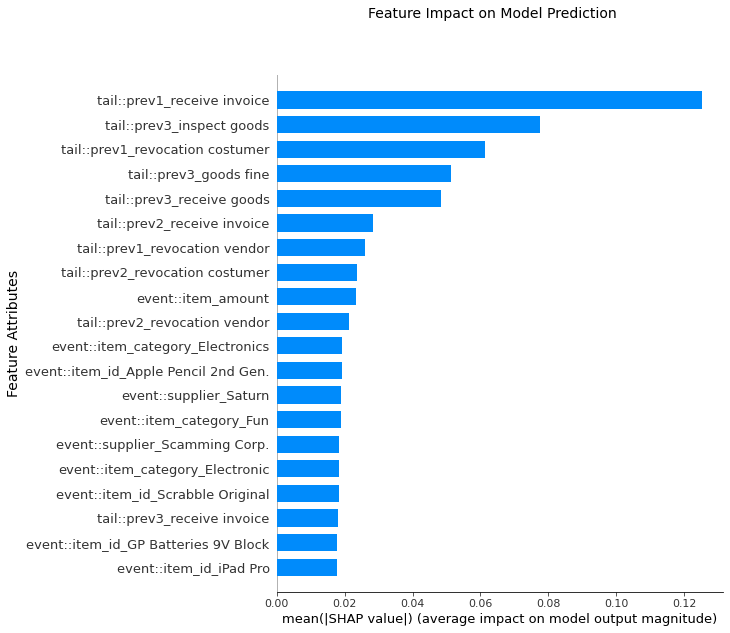

In [17]:
print("Decision point: ", decision_points[2])
nn_guard = dpn_nonlinearities.guard_manager_per_place[decision_points[2]].guards_list[ML_Technique.NN]
if nn_guard.is_explainable():
    # use sample of test data to speed up computation of explainable representation
    sampled_test_data = dpn_nonlinearities.guard_manager_per_place[decision_points[2]].df_X.sample(n = min(100, len(dpn_nonlinearities.guard_manager_per_place[decision_points[2]].df_X)))
    nn_guard.get_explainable_representation(sampled_test_data)

Decision point:  ({'request manager approval'}, {'manager reject purchase', 'manager approve purchase'})


100%|██████████| 100/100 [00:37<00:00,  2.70it/s]


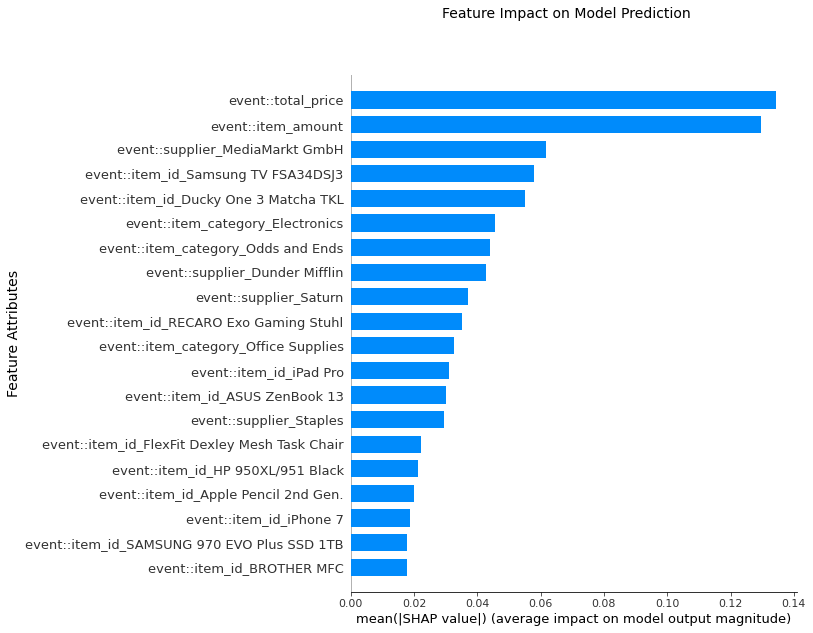

In [18]:
print("Decision point: ", decision_points[3])
nn_guard = dpn_nonlinearities.guard_manager_per_place[decision_points[3]].guards_list[ML_Technique.NN]
if nn_guard.is_explainable():
    # use sample of test data to speed up computation of explainable representation
    sampled_test_data = dpn_nonlinearities.guard_manager_per_place[decision_points[3]].df_X.sample(n = min(100, len(dpn_nonlinearities.guard_manager_per_place[decision_points[3]].df_X)))
    nn_guard.get_explainable_representation(sampled_test_data)

Decision point:  ({'inspect goods'}, {'goods fine', 'goods damaged'})


100%|██████████| 100/100 [00:52<00:00,  1.91it/s]


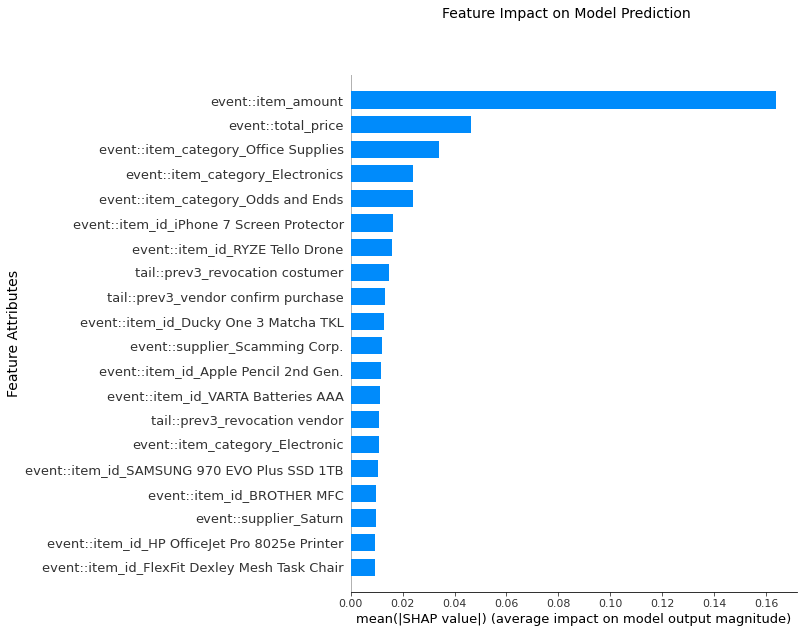

In [19]:
print("Decision point: ", decision_points[4])
nn_guard = dpn_nonlinearities.guard_manager_per_place[decision_points[4]].guards_list[ML_Technique.NN]
if nn_guard.is_explainable():
    # use sample of test data to speed up computation of explainable representation
    sampled_test_data = dpn_nonlinearities.guard_manager_per_place[decision_points[4]].df_X.sample(n = min(100, len(dpn_nonlinearities.guard_manager_per_place[decision_points[4]].df_X)))
    nn_guard.get_explainable_representation(sampled_test_data)

Decision point:  ({'receive invoice'}, {'cancel payment', 'revocation vendor', 'pay invoice', 'revocation costumer'})


100%|██████████| 100/100 [00:51<00:00,  1.93it/s]


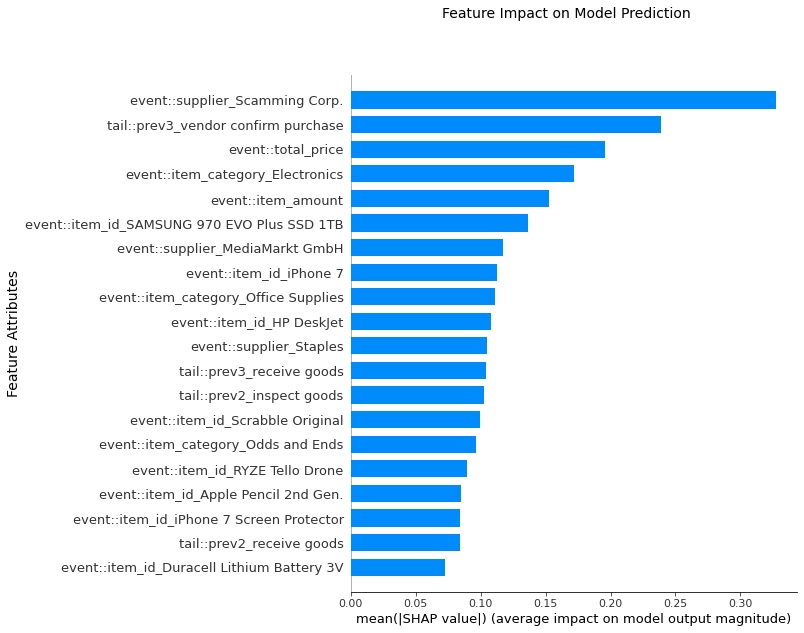

In [20]:
print("Decision point: ", decision_points[5])
nn_guard = dpn_nonlinearities.guard_manager_per_place[decision_points[5]].guards_list[ML_Technique.NN]
if nn_guard.is_explainable():
    # use sample of test data to speed up computation of explainable representation
    sampled_test_data = dpn_nonlinearities.guard_manager_per_place[decision_points[4]].df_X.sample(n = min(100, len(dpn_nonlinearities.guard_manager_per_place[decision_points[4]].df_X)))
    nn_guard.get_explainable_representation(sampled_test_data)

### Support Vector Machine

Decision point:  ({'create purchase order'}, {'request manager approval', 'request standard approval'})


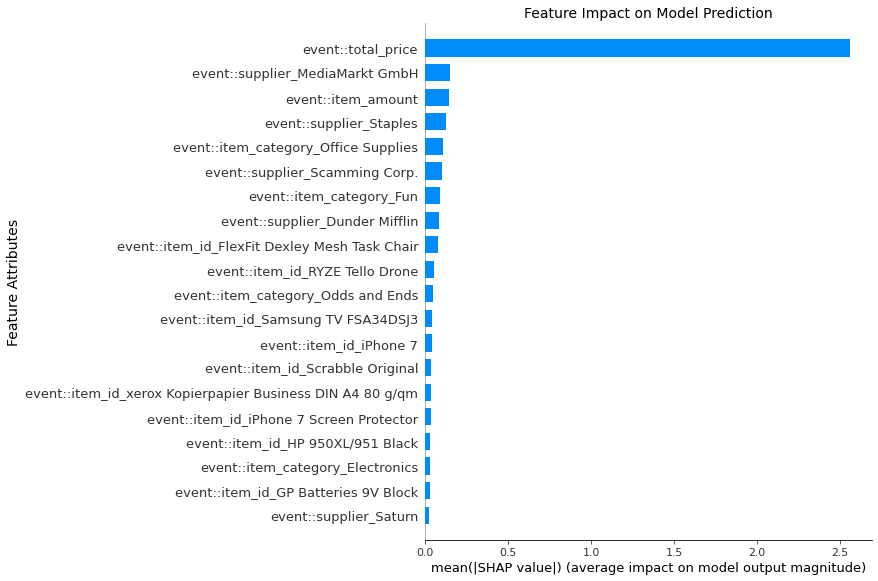

In [21]:
print("Decision point: ", decision_points[0])
svm_guard = dpn_nonlinearities.guard_manager_per_place[decision_points[0]].guards_list[ML_Technique.SVM]
if svm_guard.is_explainable():
    svm_guard.get_explainable_representation(dpn_nonlinearities.guard_manager_per_place[decision_points[0]].df_X)

Decision point:  ({'request standard approval'}, {'approve purchase', 'reject purchase'})


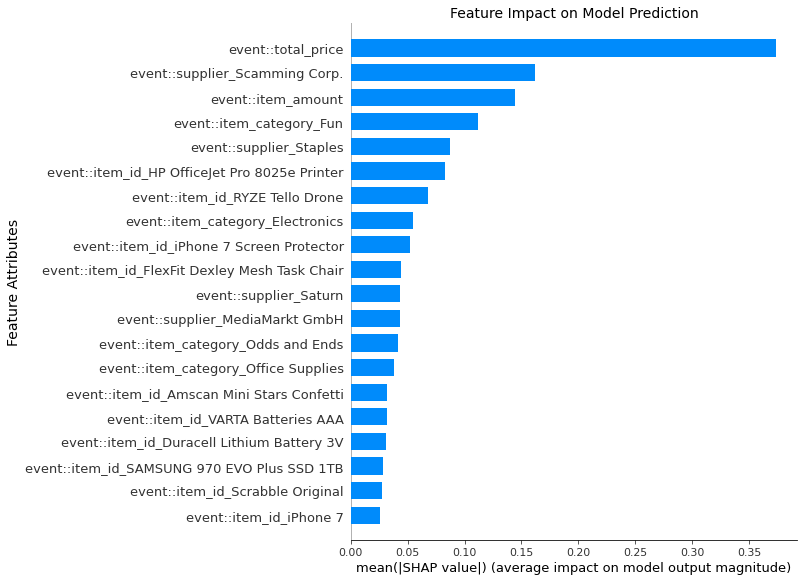

In [22]:
print("Decision point: ", decision_points[1])
svm_guard = dpn_nonlinearities.guard_manager_per_place[decision_points[1]].guards_list[ML_Technique.SVM]
if svm_guard.is_explainable():
    svm_guard.get_explainable_representation(dpn_nonlinearities.guard_manager_per_place[decision_points[1]].df_X)

Decision point:  ({'goods fine'}, {'pay invoice', 'cancel order'})


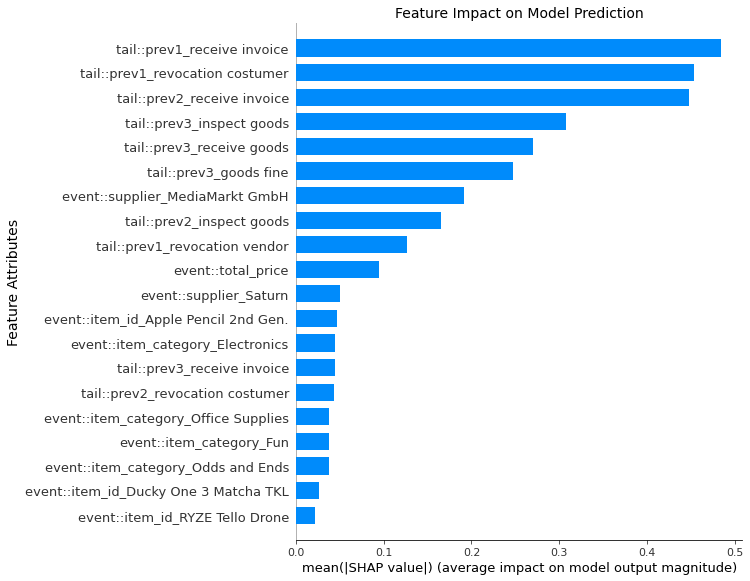

In [23]:
print("Decision point: ", decision_points[2])
svm_guard = dpn_nonlinearities.guard_manager_per_place[decision_points[2]].guards_list[ML_Technique.SVM]
if svm_guard.is_explainable():
    svm_guard.get_explainable_representation(dpn_nonlinearities.guard_manager_per_place[decision_points[2]].df_X)

Decision point:  ({'request manager approval'}, {'manager reject purchase', 'manager approve purchase'})


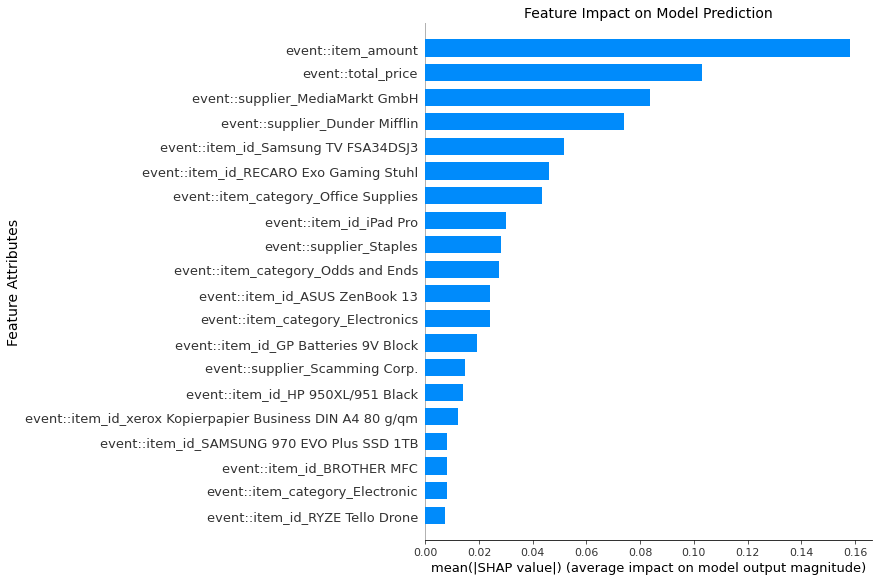

In [24]:
print("Decision point: ", decision_points[3])
svm_guard = dpn_nonlinearities.guard_manager_per_place[decision_points[3]].guards_list[ML_Technique.SVM]
if svm_guard.is_explainable():
    svm_guard.get_explainable_representation(dpn_nonlinearities.guard_manager_per_place[decision_points[3]].df_X)

Decision point:  ({'inspect goods'}, {'goods fine', 'goods damaged'})


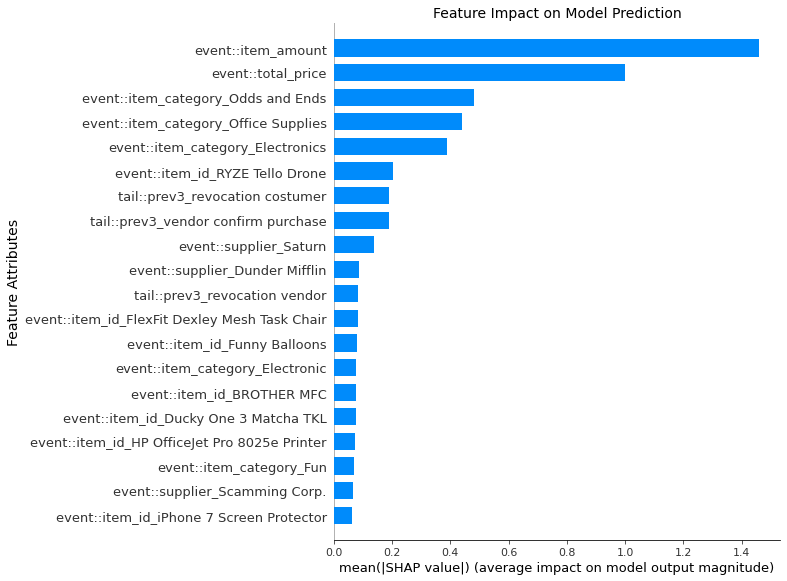

In [25]:
print("Decision point: ", decision_points[4])
svm_guard = dpn_nonlinearities.guard_manager_per_place[decision_points[4]].guards_list[ML_Technique.SVM]
if svm_guard.is_explainable():
    svm_guard.get_explainable_representation(dpn_nonlinearities.guard_manager_per_place[decision_points[4]].df_X)

Decision point:  ({'receive invoice'}, {'cancel payment', 'revocation vendor', 'pay invoice', 'revocation costumer'})


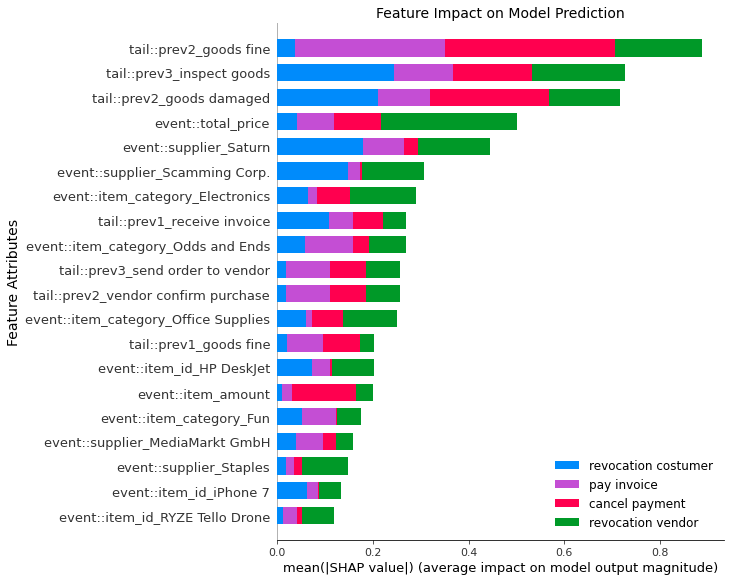

In [26]:
print("Decision point: ", decision_points[5])
svm_guard = dpn_nonlinearities.guard_manager_per_place[decision_points[5]].guards_list[ML_Technique.SVM]
if svm_guard.is_explainable():
    svm_guard.get_explainable_representation(dpn_nonlinearities.guard_manager_per_place[decision_points[5]].df_X)

### Logistic Regression

Decision point:  ({'create purchase order'}, {'request manager approval', 'request standard approval'})


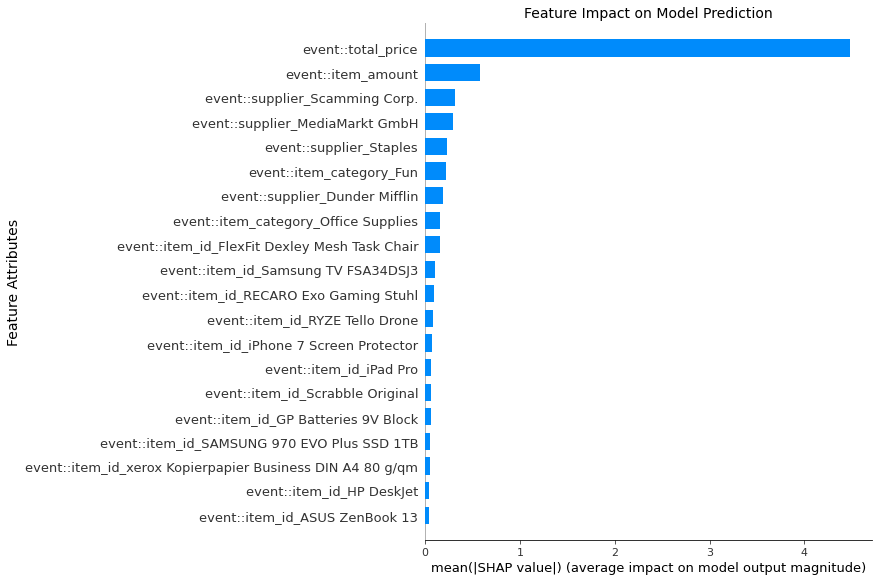

In [27]:
print("Decision point: ", decision_points[0])
lr_guard = dpn_nonlinearities.guard_manager_per_place[decision_points[0]].guards_list[ML_Technique.LR]
if lr_guard.is_explainable():
    lr_guard.get_explainable_representation(dpn_nonlinearities.guard_manager_per_place[decision_points[0]].df_X)

Decision point:  ({'request standard approval'}, {'approve purchase', 'reject purchase'})


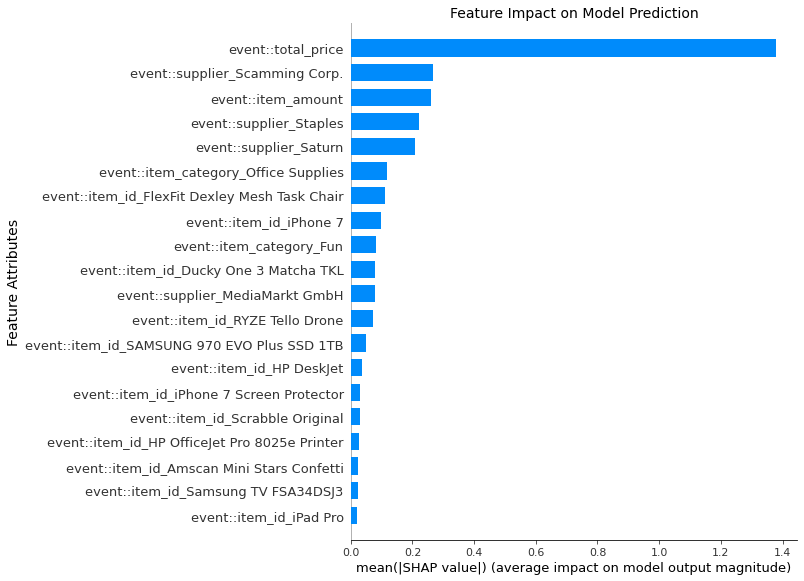

In [28]:
print("Decision point: ", decision_points[1])
lr_guard = dpn_nonlinearities.guard_manager_per_place[decision_points[1]].guards_list[ML_Technique.LR]
if lr_guard.is_explainable():
    lr_guard.get_explainable_representation(dpn_nonlinearities.guard_manager_per_place[decision_points[1]].df_X)

Decision point:  ({'goods fine'}, {'pay invoice', 'cancel order'})


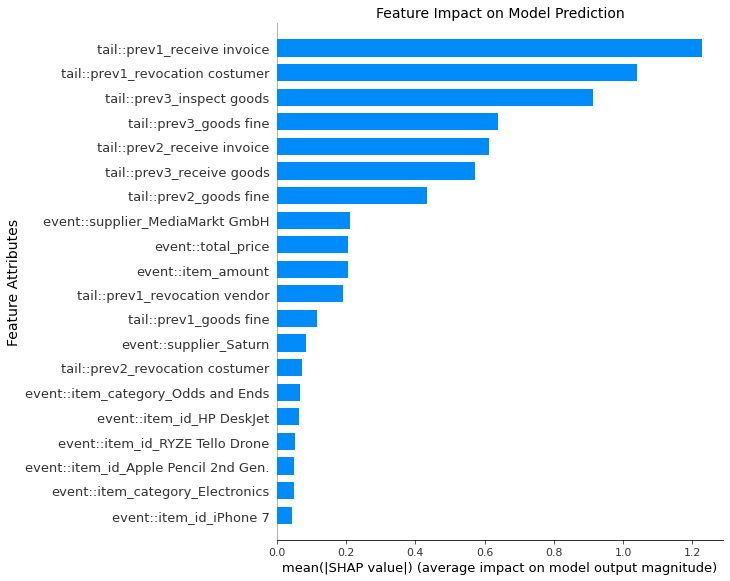

In [29]:
print("Decision point: ", decision_points[2])
lr_guard = dpn_nonlinearities.guard_manager_per_place[decision_points[2]].guards_list[ML_Technique.LR]
if lr_guard.is_explainable():
    lr_guard.get_explainable_representation(dpn_nonlinearities.guard_manager_per_place[decision_points[2]].df_X)

Decision point:  ({'request manager approval'}, {'manager reject purchase', 'manager approve purchase'})


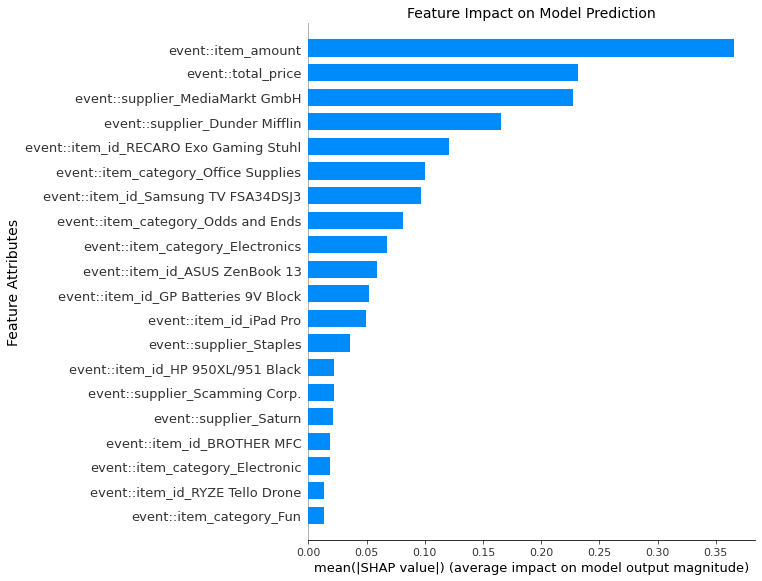

In [30]:
print("Decision point: ", decision_points[3])
lr_guard = dpn_nonlinearities.guard_manager_per_place[decision_points[3]].guards_list[ML_Technique.LR]
if lr_guard.is_explainable():
    lr_guard.get_explainable_representation(dpn_nonlinearities.guard_manager_per_place[decision_points[3]].df_X)

Decision point:  ({'inspect goods'}, {'goods fine', 'goods damaged'})


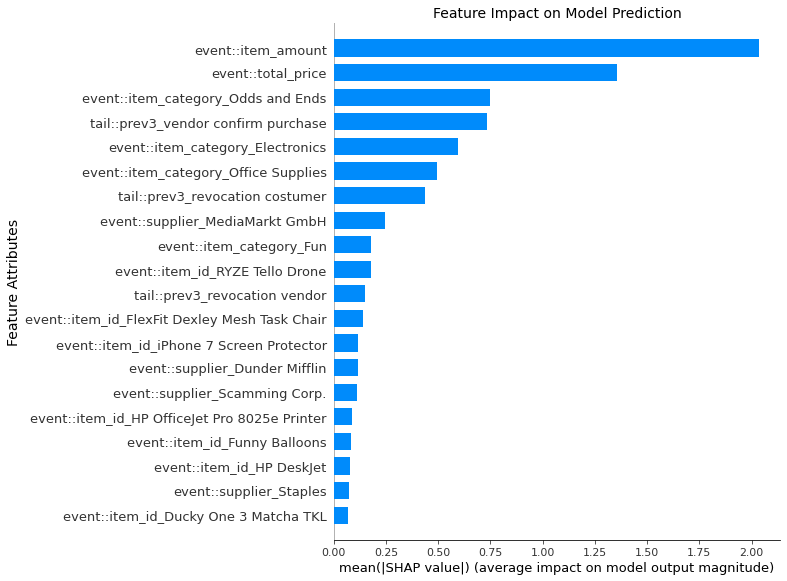

In [31]:
print("Decision point: ", decision_points[4])
lr_guard = dpn_nonlinearities.guard_manager_per_place[decision_points[4]].guards_list[ML_Technique.LR]
if lr_guard.is_explainable():
    lr_guard.get_explainable_representation(dpn_nonlinearities.guard_manager_per_place[decision_points[4]].df_X)

Decision point:  ({'receive invoice'}, {'cancel payment', 'revocation vendor', 'pay invoice', 'revocation costumer'})


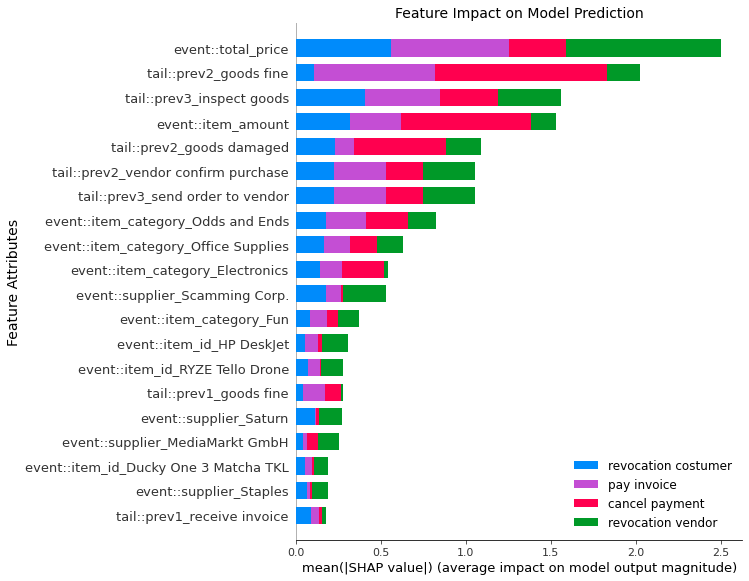

In [32]:
print("Decision point: ", decision_points[5])
lr_guard = dpn_nonlinearities.guard_manager_per_place[decision_points[5]].guards_list[ML_Technique.LR]
if lr_guard.is_explainable():
    lr_guard.get_explainable_representation(dpn_nonlinearities.guard_manager_per_place[decision_points[5]].df_X)

### Summary Event Log with Nonlinearities: 

- Request Manager or Standard Approval:  
All machine learning techniques are able to model the true underlying guard, the behavior is based on total_price and partly on the supplier "Dunder Mifflin". The Decision Tree splits the data at total_price <= 904 to classify the data samples. For the other three machine learning techniques total_price has by far the largest impact on the model prediction. "Dunder Mifflin" has a rather small impact. 

- Manager Rejection or Approval:  
Some machine learning techniques have problems modeling the true underlying guard, the behavior is based on total_price and partly random. The Decision Tree guard cannot model the behavior and assigns all samples to the same class label. For the other three machine learning techniques total_price has the largest or second largest impact on the model prediction. For the Support Vector Machine guard and the Logistic Regression guard the feature attribute with the largest impact is item_amount, this attribute is correlated with total_price. 

- Standard Rejection or Approval:  
Since this decision point has the same behavior than Manager Rejection or Approval the results are quite similar. The Decision Tree guard cannot model the behavior and assigns all samples to the same class label. For the other three machine learning techniques total_price has by far the largest impact on the model prediction. 

- Are the goods fine or damaged?  
The Decision Tree guard does not model the true underlying guard, the behavior is dependent on item_amount and total_price. The remaining three models seem to capture the underlying guard and item_amount and total_price are the feature attributes with the highest impact on the model prediction. 

- What happens if the goods are fine?  
The Decision Tree guard again assigns all samples to the same class label, which could be due to one of the stop criteria the Decision Tree Classifier uses, since the data at the decision point is unbalanced. For the remaining three machine learning techniques the feature attributes with the highest impact are several tail events (i.e., previous events) like Goods Fine and Receive Invoice. Therefore, those guards seem to model the true underlying guard, which is based on previous activities of a case. 

- What happens after Receive Invoice?  
The Decision Tree guard again assigns all samples to the same class label. The other three machine learning guards perform quite well in modeling the true underlying guard, but also pick up some noise, especially the Neural Network Guard. All three techniques use feature attributes which are related to the behavior of the true underlying guard, like tail events and attributes like total_price and item_amount. 

Overall, the different machine learning techniques perform quite differently modelling the true underlying guard if nonlinearities are at play. The modeled Decision Trees fail to model the true underlying guards most of the times, while the Neural Network guards seem to handle the nonlinearities quite well, followed by the Logistic Regression guards and Support Vector Machine guards. It is to be noted that for all decision points except Request Standard Approval and Request Manager Approval the feature attributes total_price and item_amount are highly correlated, this makes the resulting SHAP values less reliable. While for Goods fine or damaged, Standard Rejection or Approval, Request Manager or Standard Approval and what happens if good are fine are quite good, all four techniques only have mediocre performance scores measures using F1-score for Manager Rejection or Approval and what happens after Receive Invoice as seen in the comparison plots. The performances of the Decision Tree guards are particularly bad for those two decision points, as well as for Goods fine or damaged.
